In [3]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6

Date
2020-03-08      3
2020-03-09      0
2020-03-10      0
2020-03-11      0
2020-03-12      0
2020-03-13      0
2020-03-14      0
2020-03-15      2
2020-03-16      3
2020-03-17      2
2020-03-18      4
2020-03-19      3
2020-03-20      3
2020-03-21      4
2020-03-22      3
2020-03-23      6
2020-03-24      6
2020-03-25      0
2020-03-26      5
2020-03-27      4
2020-03-28      0
2020-03-29      0
2020-03-30      1
2020-03-31      2
2020-04-01      3
2020-04-02      2
2020-04-03      5
2020-04-04      9
2020-04-05     18
2020-04-06     35
2020-04-07     41
2020-04-08     54
2020-04-09    112
2020-04-10     94
2020-04-11     58
2020-04-12    139
2020-04-13    182
2020-04-14    209
2020-04-15    268
2020-04-16    292
2020-04-17    266
2020-04-18    306
2020-04-19    312
2020-04-20    492
Name: Case, dtype: int64


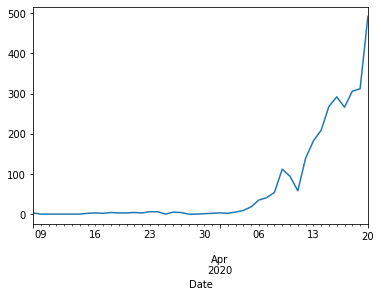

In [4]:
dataFromCsv = pd.read_csv('day-test.csv',header=0, parse_dates=[0], index_col=0, squeeze=True)
# dataFromCsv['Date'] = pd.to_datetime(dataFromCsv['Date'], infer_datetime_format=True)
# indexDataSet = dataFromCsv[['Date','Case']]
# indexDataSet = indexDataSet.set_index(['Date'])
print(dataFromCsv)
dataFromCsv.plot()
plt.show()

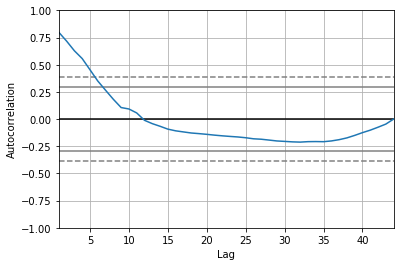

In [5]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(dataFromCsv)
plt.show()


In [12]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(dataFromCsv, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Case   No. Observations:                   43
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -210.473
Method:                       css-mle   S.D. of innovations             32.076
Date:                Tue, 21 Apr 2020   AIC                            434.947
Time:                        13:35:31   BIC                            447.275
Sample:                    03-09-2020   HQIC                           439.493
                         - 04-20-2020                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           14.3692     10.906      1.318      0.196      -7.006      35.745
ar.L1.D.Case     0.0059      0.273      0.021      0.983      -0.530       0.541
ar.L2.D.Case     0.0072      0.263      0.02

predicted=18.722869, expected=35.000000
predicted=46.394694, expected=41.000000
predicted=44.450900, expected=54.000000
predicted=61.916179, expected=112.000000
predicted=163.900273, expected=94.000000
predicted=98.267781, expected=58.000000
predicted=54.683018, expected=139.000000
predicted=110.237752, expected=182.000000
predicted=188.746508, expected=209.000000
predicted=216.794512, expected=268.000000


C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:220: RuntimeWarning: divide by zero encountered in true_divide
  Z_mat, R_mat, T_mat)


predicted=284.476680, expected=292.000000
predicted=302.795337, expected=266.000000
predicted=266.970711, expected=306.000000
predicted=316.579078, expected=312.000000
predicted=319.212351, expected=492.000000
Test MSE: 3833.524


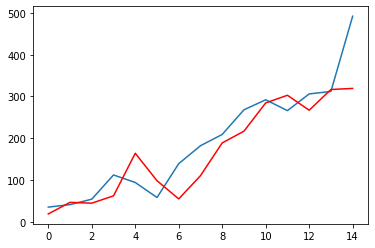

In [17]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


X = dataFromCsv.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
    
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()